<a href="https://colab.research.google.com/github/Sirisha-R-N/ImageProcessing/blob/main/DIVP_exp_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Resize a picture of size 256×256 to 16×16 by image down sampling and then perform up sampling to witness the effect of sampling. Use a suitable interpolation algorithm

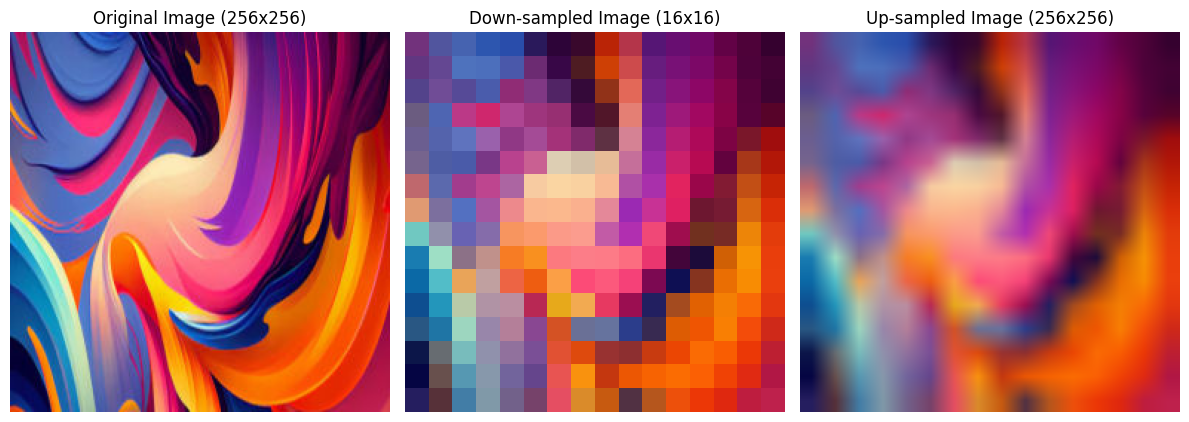

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('/content/256x256_img.jpg', cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Down-sample the image to 16x16
down_sampled = cv2.resize(image, (16, 16), interpolation=cv2.INTER_AREA)

# Up-sample the image back to 256x256
up_sampled = cv2.resize(down_sampled, (256, 256), interpolation=cv2.INTER_LINEAR)

# Plot and compare
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Original Image (256x256)')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Down-sampled Image (16x16)')
plt.imshow(down_sampled)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Up-sampled Image (256x256)')
plt.imshow(up_sampled)
plt.axis('off')

plt.tight_layout()
plt.show()


## Write a code to represent the image with varying gray level resolution

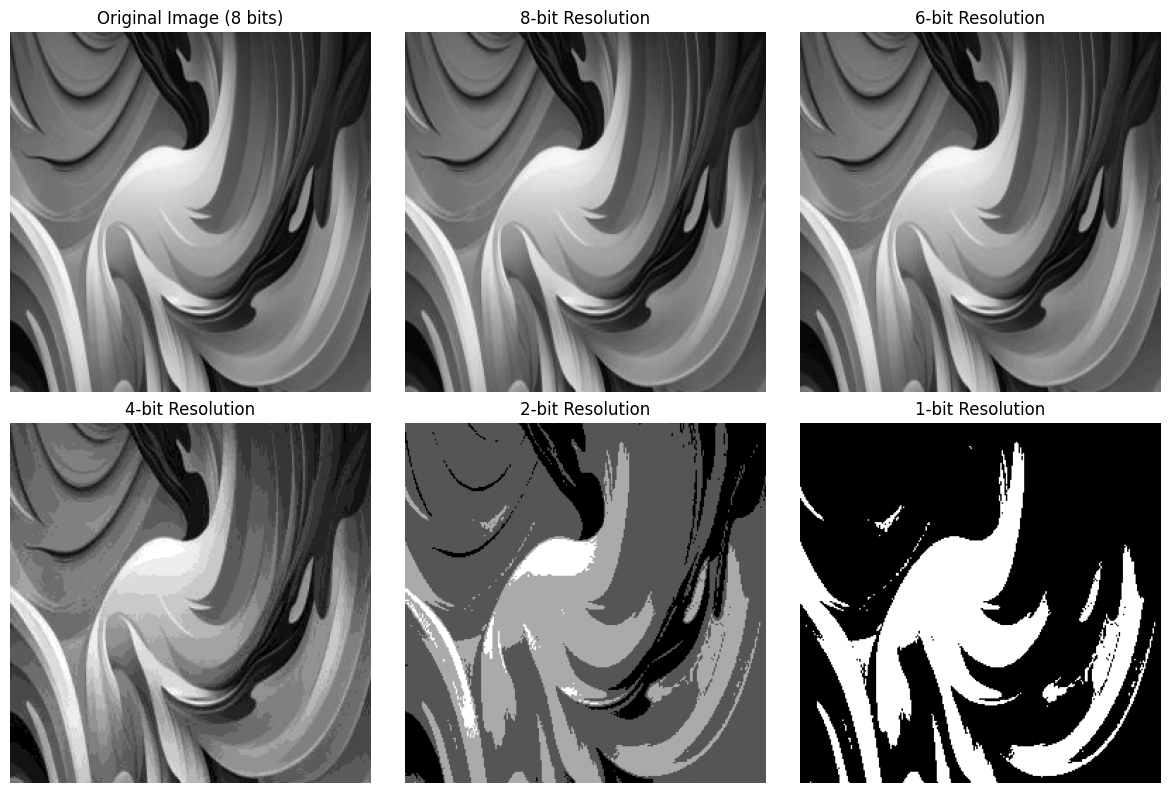

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def reduce_gray_levels(image, bit_depth):
    """
    Reduce the gray level resolution of the image to the specified bit depth.
    :param image: Input grayscale image.
    :param bit_depth: Number of bits to represent gray levels (1 to 8).
    :return: Image with reduced gray levels.
    """
    # Maximum value for the given bit depth
    max_value = (2 ** bit_depth) - 1

    # Scale down and then scale up to simulate reduced gray levels
    reduced_image = (image / 255.0) * max_value  # Scale to the range [0, max_value]
    reduced_image = np.round(reduced_image)      # Quantize to discrete levels
    reduced_image = (reduced_image / max_value) * 255.0  # Scale back to [0, 255]

    return reduced_image.astype(np.uint8)

# Load the grayscale image
image = cv2.imread('/content/256x256_img.jpg', cv2.IMREAD_GRAYSCALE)  # Replace with your image path

# Generate images with varying gray level resolutions
bit_depths = [8, 6, 4, 2, 1]
images = [reduce_gray_levels(image, bit_depth) for bit_depth in bit_depths]

# Display the original and reduced-resolution images
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.title('Original Image (8 bits)')
plt.imshow(image, cmap='gray')
plt.axis('off')

for i, (bit_depth, reduced_image) in enumerate(zip(bit_depths, images), start=2):
    plt.subplot(2, 3, i)
    plt.title(f'{bit_depth}-bit Resolution')
    plt.imshow(reduced_image, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


## Write a code to equalize the histogram of an image. Display the input and the equalized images

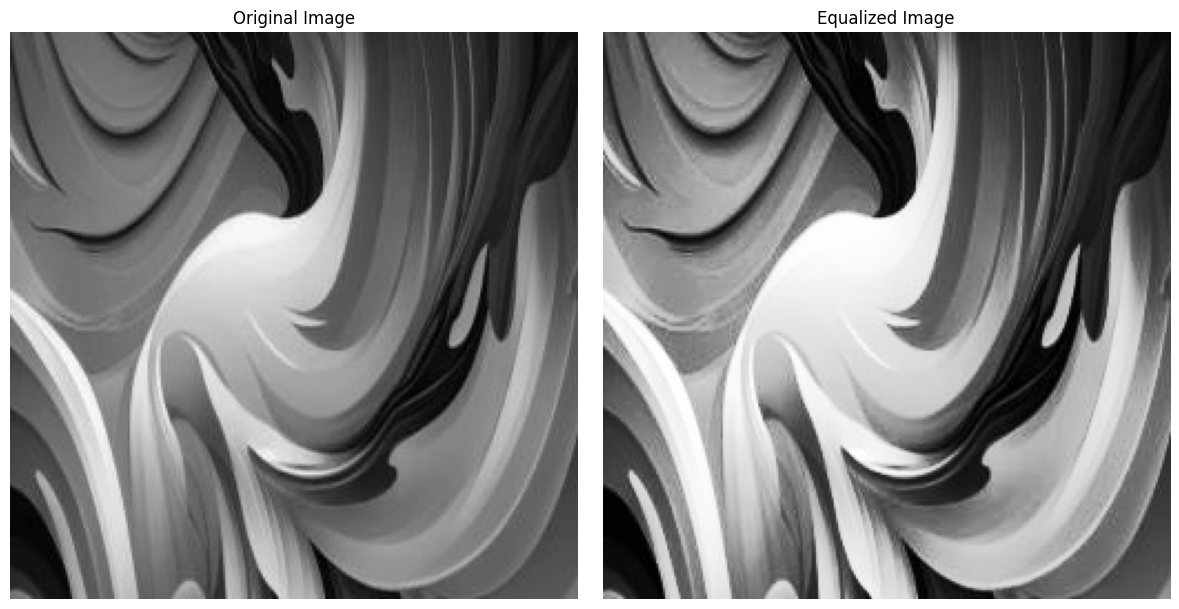

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the input image in grayscale
image = cv2.imread('/content/256x256_img.jpg', cv2.IMREAD_GRAYSCALE)  # Replace with your image path

# Equalize the histogram
equalized_image = cv2.equalizeHist(image)

# Plot the original and equalized images
plt.figure(figsize=(12, 6))

# Display the original image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

# Display the equalized image
plt.subplot(1, 2, 2)
plt.title('Equalized Image')
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


## Remove objects smaller than the given kernel size using morphological opening

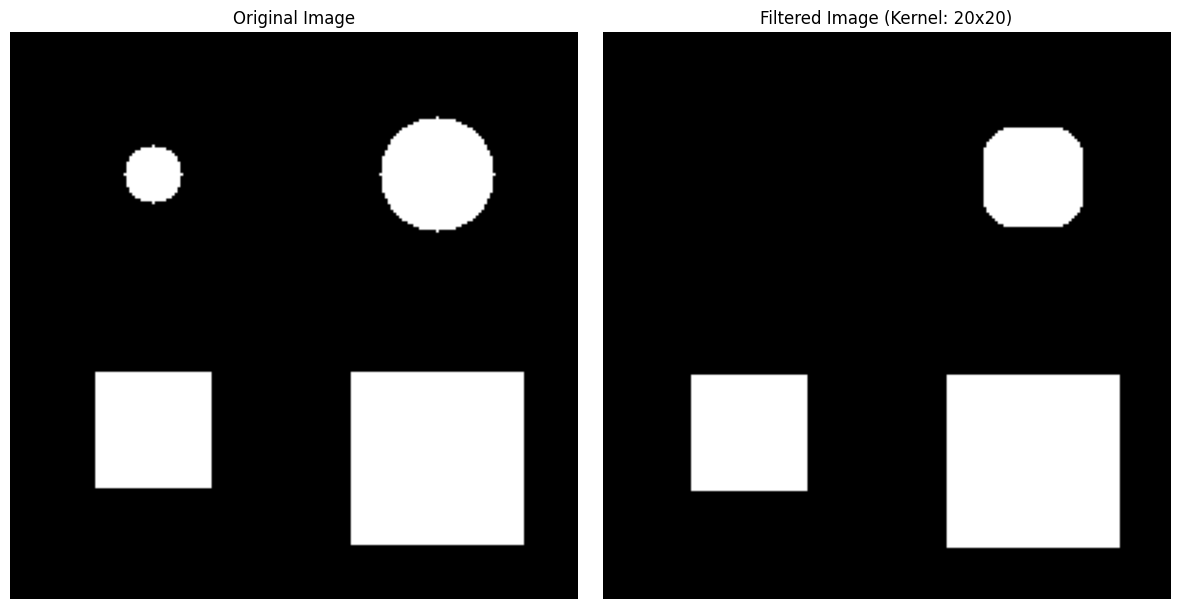

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def remove_small_objects(image, kernel_size):
    """
    Remove objects smaller than the given kernel size using morphological opening.
    :param image: Input binary image.
    :param kernel_size: Size of the structuring element (m x m).
    :return: Image with small objects removed.
    """
    # Define the structuring element
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))

    # Apply morphological opening
    opened_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    return opened_image

# Create a synthetic binary image with objects of varying sizes
image = np.zeros((200, 200), dtype=np.uint8)
cv2.circle(image, (50, 50), 10, 255, -1)  # Small object
cv2.circle(image, (150, 50), 20, 255, -1)  # Large object
cv2.rectangle(image, (30, 120), (70, 160), 255, -1)  # Small object
cv2.rectangle(image, (120, 120), (180, 180), 255, -1)  # Large object

# Define kernel size (m x m)
kernel_size = 20

# Remove small objects
filtered_image = remove_small_objects(image, kernel_size)

# Display the images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Filtered Image (Kernel: {kernel_size}x{kernel_size})")
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

## Apply Block DCT (8×8) on an image and retain only 40 coefficients per block, using this reconstruct the image and evaluate the PSNR.

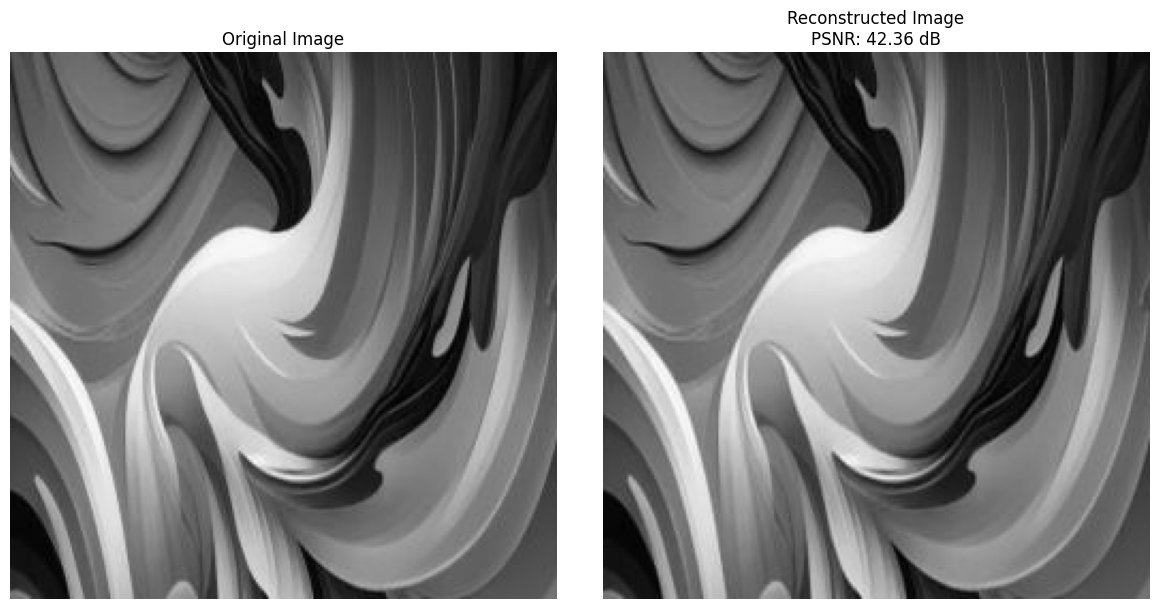

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import log10, sqrt

def dct2(block):
    """Perform 2D DCT on an 8x8 block."""
    return cv2.dct(block)

def idct2(block):
    """Perform inverse 2D DCT on an 8x8 block."""
    return cv2.idct(block)

def zigzag_indices(size):
    """Generate zigzag indices for an NxN block."""
    indices = np.arange(size * size).reshape(size, size)
    zigzag = sorted(
        ((x, y) for x in range(size) for y in range(size)),
        key=lambda p: (p[0] + p[1], -p[0] if (p[0] + p[1]) % 2 == 1 else p[1])
    )
    return [indices[x, y] for x, y in zigzag]


def retain_top_k(dct_block, k=40):
    """Retain top K coefficients in a zigzag pattern."""
    size = dct_block.shape[0]
    flat = dct_block.flatten()
    indices = zigzag_indices(size)
    mask = np.zeros_like(flat, dtype=bool)
    mask[indices[:k]] = True
    retained = np.zeros_like(flat)
    retained[mask] = flat[mask]
    return retained.reshape(size, size)

def calculate_psnr(original, reconstructed):
    """Calculate PSNR between two images."""
    mse = np.mean((original - reconstructed) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    return 20 * log10(max_pixel / sqrt(mse))

# Load the grayscale image
image = cv2.imread('/content/256x256_img.jpg', cv2.IMREAD_GRAYSCALE)  # Replace with your image path

# Ensure the image dimensions are divisible by 8
h, w = image.shape
h_new, w_new = (h // 8) * 8, (w // 8) * 8
image = image[:h_new, :w_new]

# Initialize the reconstructed image
reconstructed_image = np.zeros_like(image, dtype=np.float32)

# Block processing
block_size = 8
for i in range(0, h_new, block_size):
    for j in range(0, w_new, block_size):
        # Extract 8x8 block
        block = image[i:i+block_size, j:j+block_size].astype(np.float32)

        # Apply DCT
        dct_block = dct2(block)

        # Retain top 40 coefficients
        dct_block = retain_top_k(dct_block, k=40)

        # Apply inverse DCT
        reconstructed_block = idct2(dct_block)

        # Place the reconstructed block in the output image
        reconstructed_image[i:i+block_size, j:j+block_size] = reconstructed_block

# Clip pixel values to valid range
reconstructed_image = np.clip(reconstructed_image, 0, 255).astype(np.uint8)

# Calculate PSNR
psnr = calculate_psnr(image, reconstructed_image)

# Display the images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Reconstructed Image\nPSNR: {psnr:.2f} dB')
plt.imshow(reconstructed_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


## Apply single level DWT on an image and visualize the following
#### i) approximation (LL) and detail subbands (LH, HL, HH) as separate images
#### ii) Retain only the LL sub band and set other subbands to zero and reconstruct the image using the inverse DWT
#### iii) threshold the coefficients in all subbands except LL and reconstruct the image using the inverse DWT.
#### Compute PSNR, SSIM, and MSE for ii and iii.

In [ ]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 46.7 MB/s eta 0:00:00


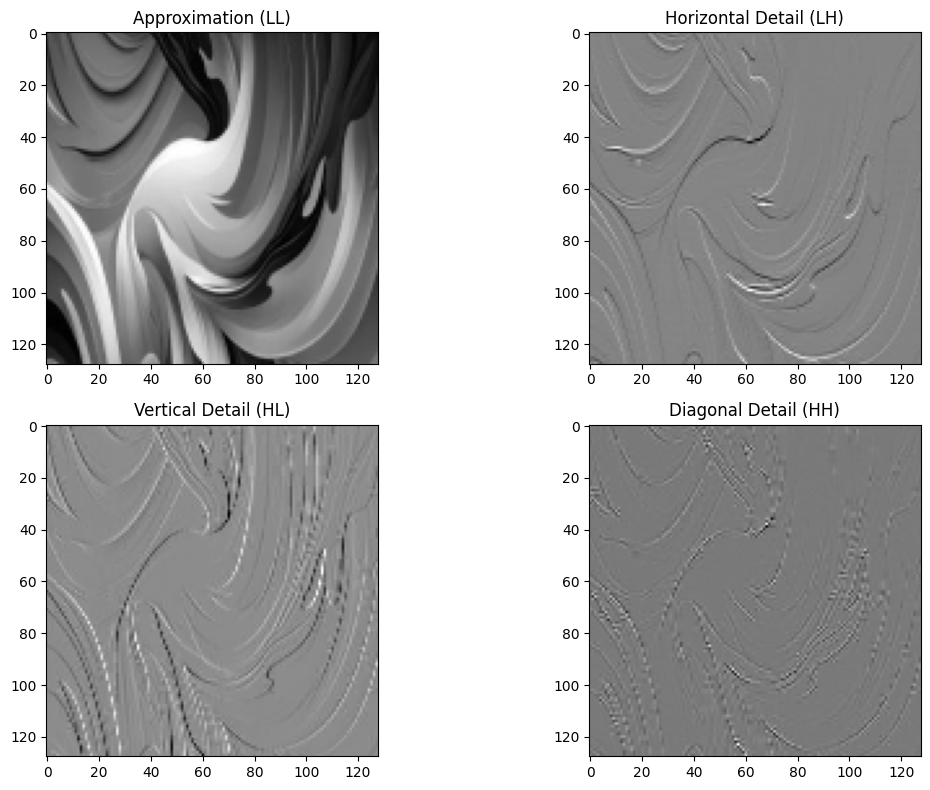

Metrics for retaining LL only:
PSNR: 30.45, MSE: 58.58, SSIM: 0.9120

Metrics for thresholded coefficients:
PSNR: 36.31, MSE: 15.19, SSIM: 0.9574


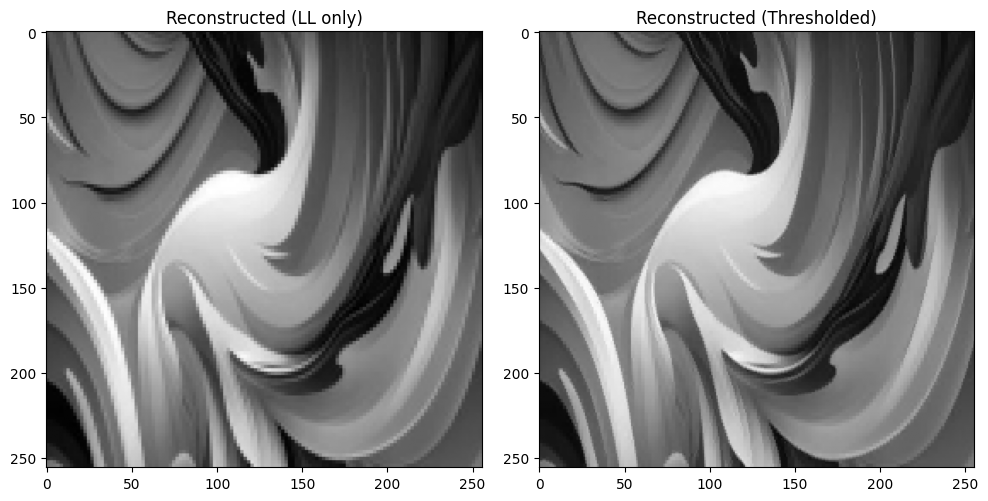

In [ ]:
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from math import log10, sqrt

# Function to calculate PSNR
def calculate_psnr(original, reconstructed):
    mse = np.mean((original - reconstructed) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# Function to calculate MSE
def calculate_mse(original, reconstructed):
    return np.mean((original - reconstructed) ** 2)

# Function to perform single-level DWT
def single_level_dwt(image):
    coeffs2 = pywt.dwt2(image, 'haar')
    LL, (LH, HL, HH) = coeffs2
    return LL, LH, HL, HH, coeffs2

# Load and preprocess image
image_path = '/content/256x256_img.jpg'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (256, 256))  # Resize to a fixed size

# Perform single-level DWT
LL, LH, HL, HH, coeffs2 = single_level_dwt(image)

# Visualize the subbands
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1), plt.imshow(LL, cmap='gray'), plt.title('Approximation (LL)')
plt.subplot(2, 2, 2), plt.imshow(LH, cmap='gray'), plt.title('Horizontal Detail (LH)')
plt.subplot(2, 2, 3), plt.imshow(HL, cmap='gray'), plt.title('Vertical Detail (HL)')
plt.subplot(2, 2, 4), plt.imshow(HH, cmap='gray'), plt.title('Diagonal Detail (HH)')
plt.tight_layout()
plt.show()

# Task ii: Retain only LL and set others to zero
zeroed_coeffs = (LL, (np.zeros_like(LH), np.zeros_like(HL), np.zeros_like(HH)))
reconstructed_image_ll = pywt.idwt2(zeroed_coeffs, 'haar')

# Task iii: Threshold LH, HL, HH and reconstruct
threshold = 20  # Example threshold value
LH_thresh = np.where(np.abs(LH) > threshold, LH, 0)
HL_thresh = np.where(np.abs(HL) > threshold, HL, 0)
HH_thresh = np.where(np.abs(HH) > threshold, HH, 0)
thresholded_coeffs = (LL, (LH_thresh, HL_thresh, HH_thresh))
reconstructed_image_thresh = pywt.idwt2(thresholded_coeffs, 'haar')

# Compute metrics
psnr_ll = calculate_psnr(image, reconstructed_image_ll)
mse_ll = calculate_mse(image, reconstructed_image_ll)
ssim_ll = ssim(image, reconstructed_image_ll, data_range=reconstructed_image_ll.max() - reconstructed_image_ll.min())

psnr_thresh = calculate_psnr(image, reconstructed_image_thresh)
mse_thresh = calculate_mse(image, reconstructed_image_thresh)
ssim_thresh = ssim(image, reconstructed_image_thresh, data_range=reconstructed_image_thresh.max() - reconstructed_image_thresh.min())

# Display results
print("Metrics for retaining LL only:")
print(f"PSNR: {psnr_ll:.2f}, MSE: {mse_ll:.2f}, SSIM: {ssim_ll:.4f}")

print("\nMetrics for thresholded coefficients:")
print(f"PSNR: {psnr_thresh:.2f}, MSE: {mse_thresh:.2f}, SSIM: {ssim_thresh:.4f}")

# Visualize reconstructed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(reconstructed_image_ll, cmap='gray'), plt.title('Reconstructed (LL only)')
plt.subplot(1, 2, 2), plt.imshow(reconstructed_image_thresh, cmap='gray'), plt.title('Reconstructed (Thresholded)')
plt.tight_layout()
plt.show()
